In [9]:
import math
import pygame
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt

In [12]:
def rotate_backward(im, deg):
    rad = np.deg2rad(-deg)
    c = np.cos(rad)
    s = np.sin(rad)

    dst = np.zeros(im.shape, dtype='uint8')
    dst[:,:,0] = 255
    dst[:,:,3] = 255

    for yr in range(dst.shape[0]):
        for xr in range(dst.shape[1]):
            x = xr * c - yr * s
            y = xr * s + yr * c

            xi = int(x)
            yi = int(y)

            if yi < 0 or xi < 0 or yi >= im.shape[0]-1 or xi >= im.shape[1] -1:
                continue

            # xip1 = xi + 1
            # yip1 = yi + 1

            average = (im[yi, xi].astype(float) + im[yi, xi+1].astype(float) + im[yi+1, xi+1].astype(float) + im[yi+1, xi].astype(float)) / 4.
            avg = np.zeros((4,), dtype='uint8')
            for i in range(4):
                if average[i] > 255:
                    avg[i] = 255
                else:
                    avg[i] = average[i].astype('uint8')
            # avg[3] = 255

            # if yi < 0 or yi >= im.shape[0] or xi >= im.shape[1]:
            #     continue

            # dst[yr, xr] = im[yi, xi]
            dst[yr, xr] = avg
    #
    return dst

C:\Users\ejeon\AppData\Local\Temp\ipykernel_15680\3708307692.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('assets/terrain.png')


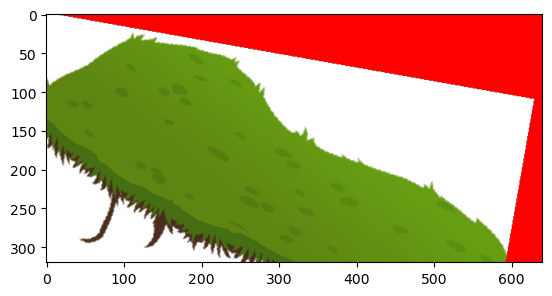

In [13]:
im = imageio.imread('assets/terrain.png')
deg = 10
dst10 = rotate_backward(im, deg)
plt.imshow(dst10)
imageio.imsave(f"dst{deg}.png", dst10)

In [14]:
def rotate_backward_average(im, deg):
    rad = np.deg2rad(-deg)
    c = np.cos(rad)
    s = np.sin(rad)

    dst = np.zeros(im.shape, dtype='uint8')
    print("shape:", im.shape)
    dst[:,:,0] = 255
    dst[:,:,3] = 255

    for yr in range(dst.shape[0]):
        for xr in range(dst.shape[1]):
            x = xr * c - yr * s
            y = xr * s + yr * c

            xi = int(x)
            yi = int(y)

            if yi < 0 or xi < 0 or yi >= im.shape[0]-1 or xi >= im.shape[1] -1:
                continue

            # xip1 = xi + 1
            # yip1 = yi + 1

            # average = (im[yi, xi].astype(float) + im[yi, xi+1].astype(float) + im[yi+1, xi+1].astype(float) + im[yi+1, xi].astype(float)) / 4.
            # avg = np.zeros((4,), dtype='uint8')
            # for i in range(4):
            #     if average[i] > 255:
            #         avg[i] = 255
            #     else:
            #         avg[i] = average[i].astype('uint8')
            # avg[3] = 255

            # if yi < 0 or yi >= im.shape[0] or xi >= im.shape[1]:
            #     continue

            dst[yr, xr] = im[yi, xi]
            # dst[yr, xr] = avg
    #
    return dst

C:\Users\ejeon\AppData\Local\Temp\ipykernel_15680\1402217385.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('assets/terrain.png')


shape: (320, 640, 4)


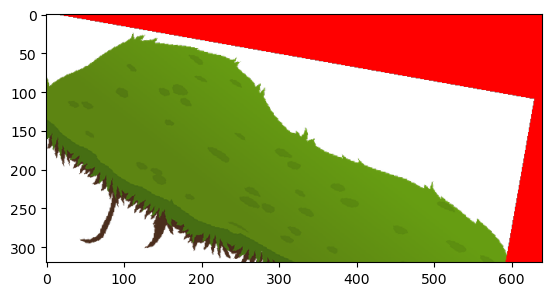

In [16]:
im = imageio.imread('assets/terrain.png')
deg = 10
dst10 = rotate_backward_average(im, deg)
plt.imshow(dst10)
imageio.imsave(f"dstav{deg}.png", dst10)

In [23]:
def rotate_backward_bilinear(im, deg, center = None):
    rad = np.deg2rad(-deg)
    c = np.cos(rad)
    s = np.sin(rad)

    if center is None: #
        center = np.array([im.shape[1], im.shape[0]]) /2. #
    
    x0, y0 = center
    

    dst = np.zeros(im.shape, dtype='uint8')
    dst[:,:,0] = 255
    dst[:,:,3] = 255

    for yr in range(dst.shape[0]):
        for xr in range(dst.shape[1]):
            x = xr * c - yr * s
            y = xr * s + yr * c

            x = (xr - x0)*c - (yr - y0)*s + x0
            y = (xr - x0)*s + (yr - y0)*c + y0

            xi = int(x)
            yi = int(y)

            if yi < 0 or xi < 0 or yi >= im.shape[0]-1 or xi >= im.shape[1] -1:
                continue

            # xip1 = xi + 1
            # yip1 = yi + 1

            #average = (im[yi, xi].astype(float) + im[yi, xi+1].astype(float) + im[yi+1, xi+1].astype(float) + im[yi+1, xi].astype(float)) / 4.
            #avg = np.zeros((4,), dtype='uint8')
            #for i in range(4):
            #    if average[i] > 255:
            #        avg[i] = 255
            #    else:
            #       avg[i] = average[i].astype('uint8')
            # avg[3] = 255

            # if yi < 0 or yi >= im.shape[0] or xi >= im.shape[1]:
            #     continue

            # dst[yr, xr] = im[yi, xi]
            def linintr(w, a, b):
                a = a.astype('float')
                b = b.astype('float') 
                c = w*b + (1. - w)*a
                return c

            alpha = x -xi
            beta = y - yi
            J0 = linintr(beta, im[yi, xi], im[yi+1, xi])
            J1 = linintr(beta, im[yi, xi+1], im[yi+1, xi+1])
            J = linintr(alpha, J0, J1)
            dst[yr, xr] = J.astype('uint8')
    #
    return dst

C:\Users\ejeon\AppData\Local\Temp\ipykernel_15680\3430455182.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('assets/terrain.png')


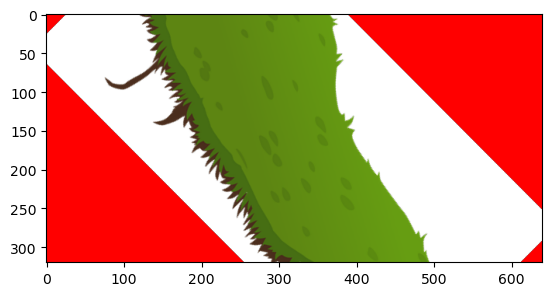

In [24]:
dst = rotate_backward_bilinear(im, 45, center=(320, 160))
im = imageio.imread('assets/terrain.png')
deg = 10
plt.imshow(dst)
imageio.imsave(f"dstavcenter{deg}.png", dst)


In [ ]:
def rotate_backward_bilinear(im, deg, center = None):
    rad = np.deg2rad(-deg)
    c = np.cos(rad)
    s = np.sin(rad)

    if center is None: #
        center = np.array([im.shape[0], im.shape[1]] /2.) #
    
    x0, y0 = center
    

    dst = np.zeros(im.shape, dtype='uint8')
    dst[:,:,0] = 255
    dst[:,:,3] = 255

    for yr in range(dst.shape[0]):
        for xr in range(dst.shape[1]):
            x = xr * c - yr * s
            y = xr * s + yr * c

            x = (xr - x0)*c - (yr - y0)*s
            y = (xr - x0)*s + (yr - y0)*c

            xi = int(x)
            yi = int(y)

            if yi < 0 or xi < 0 or yi >= im.shape[0]-1 or xi >= im.shape[1] -1:
                continue

            # xip1 = xi + 1
            # yip1 = yi + 1

            #average = (im[yi, xi].astype(float) + im[yi, xi+1].astype(float) + im[yi+1, xi+1].astype(float) + im[yi+1, xi].astype(float)) / 4.
            #avg = np.zeros((4,), dtype='uint8')
            #for i in range(4):
            #    if average[i] > 255:
            #        avg[i] = 255
            #    else:
            #       avg[i] = average[i].astype('uint8')
            # avg[3] = 255

            # if yi < 0 or yi >= im.shape[0] or xi >= im.shape[1]:
            #     continue

            # dst[yr, xr] = im[yi, xi]
            def linintr(w, a, b):
                a = a.astype('float')
                b = b.astype('float') 
                c = w*b + (1. - w)*a
                return c

            alpha = x -xi
            beta = y - yi
            J0 = linintr(beta, im[yi, xi], im[yi+1, xi])
            J1 = linintr(beta, im[yi, xi+1], im[yi+1, xi+1])
            J = linintr(alpha, J0, J1)
            dst[yr, xr] = J.astype('uint8')
    #
    return dst